In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
sham=pd.read_csv("spam.csv",sep=',',encoding='latin-1')

In [7]:
sham.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
sam=sham.iloc[:,:2]
sam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
sam.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

C:\Users\SANTOSH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


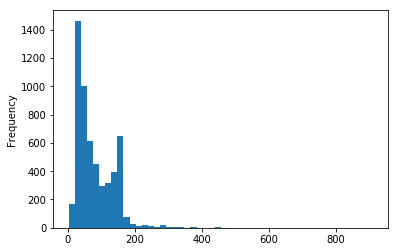

In [14]:
sam['length'] = sam['v2'].apply(len)
sam['length'].plot(bins=50, kind='hist') 

In [15]:
sam['length'].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024FFDF6D4A8>,
      dtype=object)

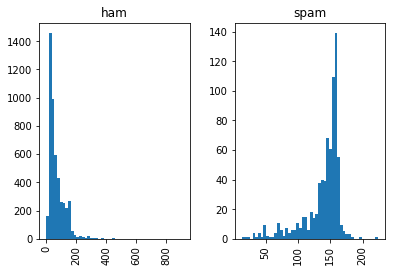

In [19]:
sam.hist(column='length', by='v1', bins=50)

In [24]:
import string
string.punctuation
sam=' '.join([char for char in sam if char not in string.punctuation])

In [26]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopword=stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SANTOSH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
from nltk.stem import WordNetLemmatizer

In [45]:
corpus=[]
for i in range(0,5572):
    text=re.sub('[^a-zA-Z]',' ',sam['v2'][i])
    text=text.lower()
    text=text.split()
    text=[word for word in text if not word in stopword]
    wn=nltk.WordNetLemmatizer()
    text=[wn.lemmatize(word) for word in text]
    text=' '.join(text)
    corpus.append(text)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
tfidf_vec=TfidfVectorizer()
x=tfidf_vec.fit_transform(corpus)

tfidf_vec.get_feature_names()

['aa',
 'aah',
 'aaniye',
 'aaooooright',
 'aathi',
 'ab',
 'abbey',
 'abdomen',
 'abeg',
 'abel',
 'aberdeen',
 'abi',
 'ability',
 'abiola',
 'abj',
 'able',
 'abnormally',
 'aboutas',
 'abroad',
 'absence',
 'absolutely',
 'absolutly',
 'abstract',
 'abt',
 'abta',
 'aburo',
 'abuse',
 'abuser',
 'ac',
 'academic',
 'acc',
 'accent',
 'accenture',
 'accept',
 'access',
 'accessible',
 'accidant',
 'accident',
 'accidentally',
 'accommodation',
 'accommodationvouchers',
 'accomodate',
 'accomodations',
 'accordin',
 'accordingly',
 'account',
 'accounting',
 'accumulation',
 'achan',
 'ache',
 'achieve',
 'acid',
 'acknowledgement',
 'acl',
 'acnt',
 'aco',
 'across',
 'act',
 'acted',
 'actin',
 'acting',
 'action',
 'activ',
 'activate',
 'active',
 'activity',
 'actor',
 'actual',
 'actually',
 'ad',
 'adam',
 'add',
 'addamsfa',
 'added',
 'addicted',
 'addie',
 'adding',
 'address',
 'adewale',
 'adi',
 'adjustable',
 'admin',
 'administrator',
 'admirer',
 'admission',
 'admit'

In [48]:
x.shape


(5572, 7021)

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec=CountVectorizer(max_features=5000)
x=count_vec.fit_transform(corpus).toarray()

count_vec.get_feature_names()

['aa',
 'aah',
 'aathi',
 'abi',
 'ability',
 'abiola',
 'abj',
 'able',
 'absolutly',
 'abt',
 'abta',
 'aburo',
 'ac',
 'academic',
 'acc',
 'accept',
 'access',
 'accident',
 'accidentally',
 'accordingly',
 'account',
 'ache',
 'acl',
 'aco',
 'across',
 'acted',
 'action',
 'activate',
 'active',
 'activity',
 'actor',
 'actual',
 'actually',
 'ad',
 'adam',
 'add',
 'addamsfa',
 'added',
 'addicted',
 'addie',
 'address',
 'admin',
 'administrator',
 'admirer',
 'admit',
 'adore',
 'adoring',
 'adult',
 'advance',
 'adventure',
 'advice',
 'advise',
 'ae',
 'aeronautics',
 'aeroplane',
 'affair',
 'affection',
 'afraid',
 'aft',
 'afternoon',
 'aftr',
 'ag',
 'agalla',
 'age',
 'agent',
 'ago',
 'agree',
 'ah',
 'aha',
 'ahead',
 'ahmad',
 'aid',
 'aight',
 'aint',
 'air',
 'airport',
 'airtel',
 'aiya',
 'aiyah',
 'aiyar',
 'aiyo',
 'aj',
 'aka',
 'al',
 'alaipayuthe',
 'album',
 'alcohol',
 'alert',
 'alex',
 'alfie',
 'algarve',
 'ali',
 'alive',
 'allah',
 'allow',
 'allowed'

In [50]:
y=sam['v1']

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [52]:
from sklearn.naive_bayes import GaussianNB
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.20, random_state=0)
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [53]:
y_pred=gnb.predict(x_test)

In [55]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[839, 110],
       [ 23, 143]], dtype=int64)

In [56]:
ac=accuracy_score(y_test,y_pred)
ac

0.8807174887892377

In [57]:
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.20, random_state=0)
gnb = LogisticRegression()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)

C:\Users\SANTOSH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [58]:
ac=accuracy_score(y_test,y_pred)
ac

0.9775784753363229

In [59]:
from sklearn.tree import DecisionTreeClassifier
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.20, random_state=0)
gnb =  DecisionTreeClassifier()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)

In [60]:
ac=accuracy_score(y_test,y_pred)
ac

0.9757847533632287

In [61]:
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.20, random_state=0)
gnb = RandomForestClassifier()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)

C:\Users\SANTOSH\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [62]:
ac=accuracy_score(y_test,y_pred)
ac

0.9721973094170404